<a href="https://colab.research.google.com/github/SaimQaiser/python/blob/main/Student_Healthcare_Analysis/Student_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('gdrive/MyDrive/StudentMentalhealth.csv')


In [5]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
df.rename(columns={'Choose your gender': 'Gender', 'What is your course?': 'Course', 'Your current year of Study': 'Study_Year','What is your CGPA?':'CGPA','Do you have Depression?':'Depression','Do you have Anxiety?':'Anxiety','Do you have Panic attack?':'Panic_attack','Did you seek any specialist for a treatment?':'Treatment'}, inplace=True)


In [7]:
df.head()

,Timestamp,Gender,Age,Course,Study_Year,CGPA,Marital status,Depression,Anxiety,Panic_attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    object 
 2   Age             100 non-null    float64
 3   Course          101 non-null    object 
 4   Study_Year      101 non-null    object 
 5   CGPA            101 non-null    object 
 6   Marital status  101 non-null    object 
 7   Depression      101 non-null    object 
 8   Anxiety         101 non-null    object 
 9   Panic_attack    101 non-null    object 
 10  Treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [9]:
null_c = df['Age'].isnull().sum()
print(null_c)

1


In [10]:
average_age = round(df['Age'].mean())
df['Age'].fillna(average_age, inplace=True)

In [11]:
df.describe()

,Age
count,101.000000
mean,20.534653
std,2.484208
min,18.000000
25%,18.000000
50%,19.000000
75%,23.000000
max,24.000000


In [12]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Study_Year', 'CGPA', 'Marital status', 'Depression','Anxiety','Panic_attack','Treatment'])

In [13]:
pd.set_option('display.max_rows',None)

In [14]:
df_encoded

,Timestamp,Age,Course,Gender_Female,Gender_Male,Study_Year_Year 1,Study_Year_Year 2,Study_Year_Year 3,Study_Year_year 1,Study_Year_year 2,...,Marital status_No,Marital status_Yes,Depression_No,Depression_Yes,Anxiety_No,Anxiety_Yes,Panic_attack_No,Panic_attack_Yes,Treatment_No,Treatment_Yes
0,8/7/2020 12:02,18.0,Engineering,1,0,0,0,0,1,0,...,1,0,0,1,1,0,0,1,1,0
1,8/7/2020 12:04,21.0,Islamic education,0,1,0,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0
2,8/7/2020 12:05,19.0,BIT,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
3,8/7/2020 12:06,22.0,Laws,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,8/7/2020 12:13,23.0,Mathemathics,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5,8/7/2020 12:31,19.0,Engineering,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
6,8/7/2020 12:32,23.0,Pendidikan islam,1,0,0,0,0,0,1,...,0,1,0,1,1,0,0,1,1,0
7,8/7/2020 12:33,18.0,BCS,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
8,8/7/2020 12:35,19.0,Human Resources,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
9,8/7/2020 12:39,18.0,Irkhs,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0


<ipython-input-18-9dbb55b482fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


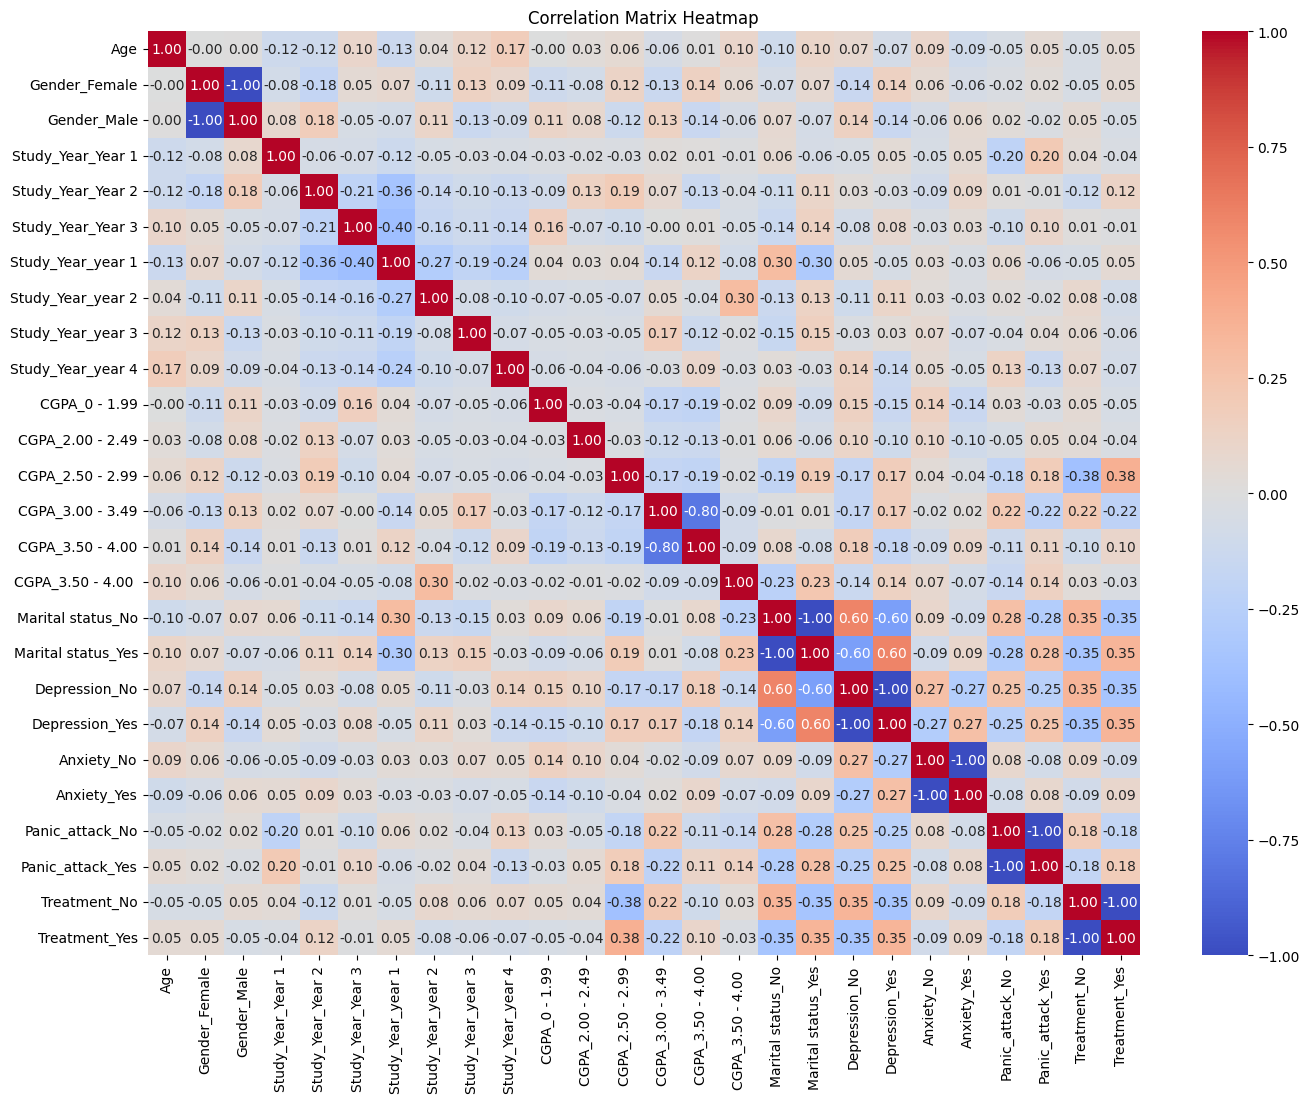

In [18]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Data Analysis**
From the correlation graph above we can see the relationship between all the Problems related to the students health and what is the cause of that problem.

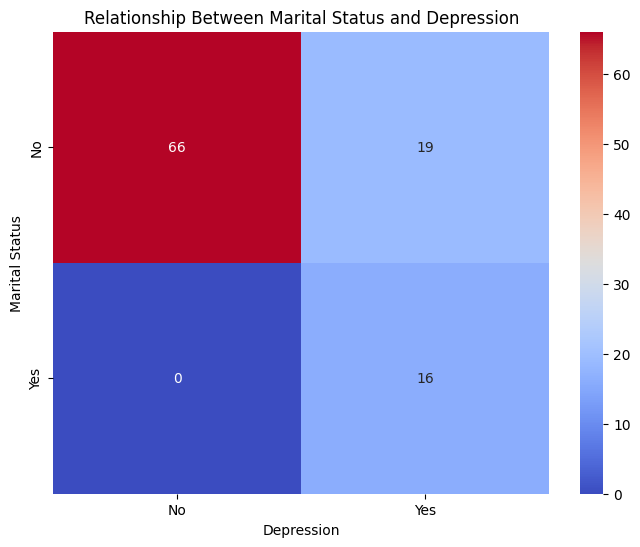

In [22]:
contingency_table = pd.crosstab(df['Marital status'], df['Depression'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship Between Marital Status and Depression')
plt.xlabel('Depression')
plt.ylabel('Marital Status')
plt.show()

**The above analysis shows that 100% of the students are depressed if they are married.**

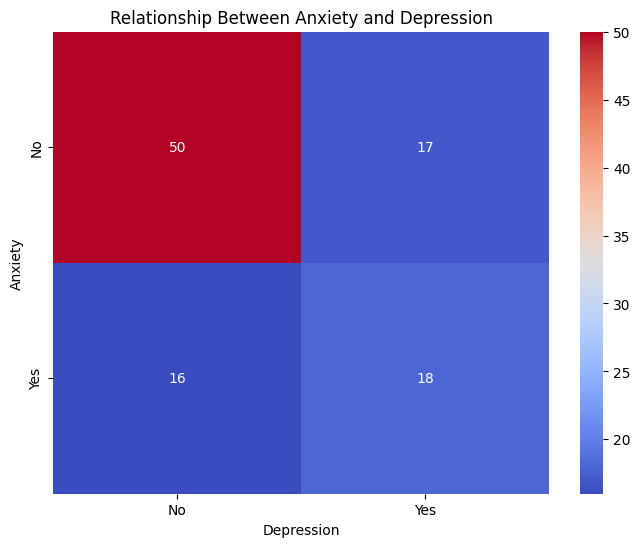

In [29]:
contingency_table = pd.crosstab(df['Anxiety'], df['Depression'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship Between Anxiety and Depression')
plt.xlabel('Depression')
plt.ylabel('Anxiety')
plt.show()

**It is shown that more than 50% people are depressed if they have anxiety.**

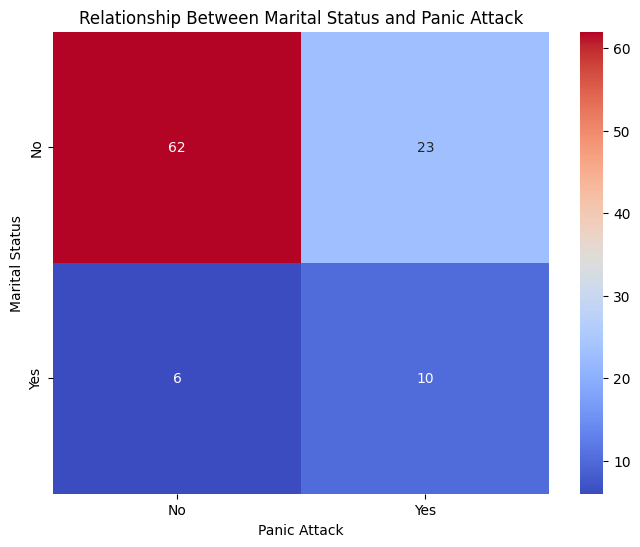

In [27]:
contingency_table = pd.crosstab(df['Marital status'], df['Panic_attack'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship Between Marital Status and Panic Attack')
plt.xlabel('Panic Attack')
plt.ylabel('Marital Status')
plt.show()

**It is seen that more than 50% student face Panic Attacks if they are married.**

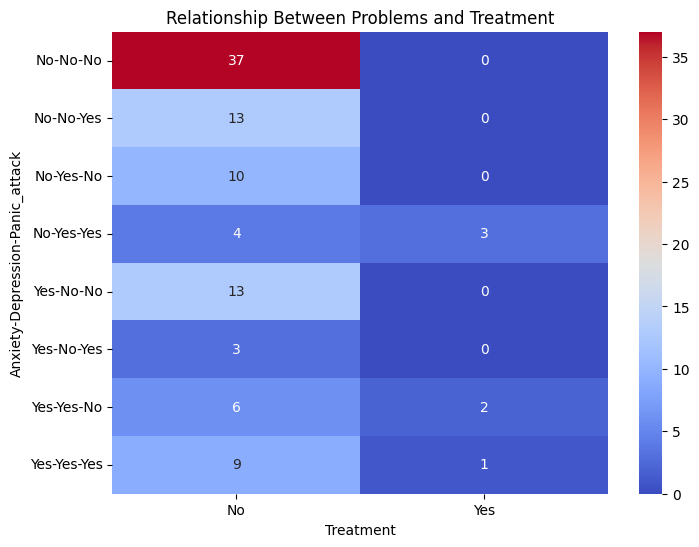

In [36]:
contingency_table = pd.crosstab(index=[df['Anxiety'], df['Depression'], df['Panic_attack']],
                                columns=df['Treatment'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship Between Problems and Treatment')
plt.xlabel('Treatment')
plt.ylabel('Anxiety-Depression-Panic_attack')
plt.show()

**It is seen that only 6 out of 101 students are getting treatment**